In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-songs-analysis/top-spotify-songs-in-countries
/kaggle/input/top-spotify-songs-in-countries/spotify_history.csv
/kaggle/input/top-spotify-songs-in-countries/spotify_data_dictionary Description.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('/kaggle/input/top-spotify-songs-in-countries/spotify_history.csv')

In [4]:
df.head()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
0,2J3n32GeLmMjwuAzyhcSNe,2013-07-08 02:44:34,web player,3185,"Say It, Just Say It",The Mowgli's,Waiting For The Dawn,autoplay,clickrow,False,False
1,1oHxIPqJyvAYHy0PVrDU98,2013-07-08 02:45:37,web player,61865,Drinking from the Bottle (feat. Tinie Tempah),Calvin Harris,18 Months,clickrow,clickrow,False,False
2,487OPlneJNni3NWC8SYqhW,2013-07-08 02:50:24,web player,285386,Born To Die,Lana Del Rey,Born To Die - The Paradise Edition,clickrow,unknown,False,False
3,5IyblF777jLZj1vGHG2UD3,2013-07-08 02:52:40,web player,134022,Off To The Races,Lana Del Rey,Born To Die - The Paradise Edition,trackdone,clickrow,False,False
4,0GgAAB0ZMllFhbNc3mAodO,2013-07-08 03:17:52,web player,0,Half Mast,Empire Of The Sun,Walking On A Dream,clickrow,nextbtn,False,False


In [5]:
df.tail()

,spotify_track_uri,ts,platform,ms_played,track_name,artist_name,album_name,reason_start,reason_end,shuffle,skipped
149855,4Fz1WWr5o0OrlIcZxcyZtK,2024-12-15 23:06:19,android,1247,On The Way Home,John Mayer,Paradise Valley,fwdbtn,fwdbtn,True,True
149856,0qHMhBZqYb99yhX9BHcIkV,2024-12-15 23:06:21,android,1515,Magical Mystery Tour - Remastered 2009,The Beatles,Magical Mystery Tour,fwdbtn,fwdbtn,True,True
149857,0HHdujGjOZChTrl8lJWEIq,2024-12-15 23:06:22,android,1283,"Stop This Train - Live at the Nokia Theatre, L...",John Mayer,Where the Light Is: John Mayer Live In Los Ang...,fwdbtn,fwdbtn,True,True
149858,7peh6LUcdNPcMdrSH4JPsM,2024-12-15 23:06:23,android,1306,I Don't Trust Myself (With Loving You),John Mayer,Continuum,fwdbtn,fwdbtn,True,True
149859,6iGU74CwXuT4XVepjc9Emf,2024-12-15 23:06:25,android,1893,God Only Knows - Mono,The Beach Boys,Pet Sounds,fwdbtn,fwdbtn,True,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149860 entries, 0 to 149859
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   spotify_track_uri  149860 non-null  object
 1   ts                 149860 non-null  object
 2   platform           149860 non-null  object
 3   ms_played          149860 non-null  int64 
 4   track_name         149860 non-null  object
 5   artist_name        149860 non-null  object
 6   album_name         149860 non-null  object
 7   reason_start       149717 non-null  object
 8   reason_end         149743 non-null  object
 9   shuffle            149860 non-null  bool  
 10  skipped            149860 non-null  bool  
dtypes: bool(2), int64(1), object(8)
memory usage: 10.6+ MB


In [7]:
df.dtypes

spotify_track_uri    object
ts                   object
platform             object
ms_played             int64
track_name           object
artist_name          object
album_name           object
reason_start         object
reason_end           object
shuffle                bool
skipped                bool
dtype: object

**SIZE OF FILE(ROWS,COLUMNS)**

In [8]:
df.shape

(149860, 11)

**COUNTING NULL VALUES**

In [9]:
df.isnull().sum()

spotify_track_uri      0
ts                     0
platform               0
ms_played              0
track_name             0
artist_name            0
album_name             0
reason_start         143
reason_end           117
shuffle                0
skipped                0
dtype: int64

INSIGHTS:
  1]reason_start and reason_end  have null values

DEALING WITH NULL VALUES:

 1]reason_start and reason_end have categorical values so we cant calculate mean and      store it into the null space.
 
 2]we can store data  into null space using Fill with mode(Most occured data)/unknown     or if missing values are more at that time using others columns we have to predict     it.
 
 3]Their is another safe option :create new category "Unknown" for missing values.
 
 4]Before starting filling values into Null Space ,Firstly we have to calculate the       percentage of missing value,according to that percentage we have to take actions.
 
 5]
  (i)If missing values are less than 5% → just fill them with the most common value        (mode) or "Unknown". No need to predict.

  (ii)If missing values are between 5% and 30% → you can predict them if the column is       important and other features can help. Otherwise, simple filling is okay.

  (iii)If missing values are between 30% and 50% → it’s better to try predicting them,        but only if there are strong related features to base the prediction on.

  (iv)If missing values are more than 50% → predicting is usually unreliable. Either         drop the column or fill with "Unknown".

**CALCULATING PERCENTAGE OF MISSING DATA**

In [10]:
miss_count=df.isnull().sum()
total=df.shape[0] #Total Number of rows
percent=(miss_count/total)*100
print(percent)

spotify_track_uri    0.000000
ts                   0.000000
platform             0.000000
ms_played            0.000000
track_name           0.000000
artist_name          0.000000
album_name           0.000000
reason_start         0.095422
reason_end           0.078073
shuffle              0.000000
skipped              0.000000
dtype: float64


**Missing values of all columns are less than 5%  so we can fill them with the most common value (mode) or "Unknown** 

Best Option:fill them with the most common value (mode)

In [11]:
df['reason_start']=df['reason_start'].fillna(df['reason_start'].mode()[0])
df['reason_end']=df['reason_end'].fillna(df['reason_end'].mode()[0])

In [12]:
df.isnull().sum()

spotify_track_uri    0
ts                   0
platform             0
ms_played            0
track_name           0
artist_name          0
album_name           0
reason_start         0
reason_end           0
shuffle              0
skipped              0
dtype: int64

**CHECKING DUPLICATE ENTRY**

In [13]:
df.duplicated().sum()

1185

NOW WE HAVE TO DECIDE WHICH DUPLICATE ENTRY SHOULD CAUSE DUPLICACY 
Suppose: Artist Name can be duplicate,Their songs also played more than 1 
but URI CAN'T BE SAME 

CONCLUSION : URI CAN'T BE SAME ,If they are then remove it

In [14]:
df=df.drop_duplicates(subset=['spotify_track_uri'])

**CHECKING AGAIN:**

In [15]:
df.duplicated().sum()

0

**Column Ts have wrong type of datatype**


In [16]:

df['ts'] = df['ts'].astype(str)


In [17]:
df['ts'] = pd.to_datetime(df['ts'], errors='coerce')


In [18]:
print(df['ts'].dtype)   


datetime64[ns]


**TOP ARTISTS**

In [19]:
top_artist=df['artist_name'].value_counts().head(10)
print(top_artist)

artist_name
The Beatles           472
The Killers           240
Paul McCartney        180
The Black Keys        173
John Mayer            156
The Rolling Stones    149
Radiohead             135
Imagine Dragons       116
The Kinks             115
Bob Dylan             106
Name: count, dtype: int64


**MOST PLAYED SONGS**

In [20]:
most_played=df['album_name'].value_counts().head(10)
print(most_played)

album_name
The Beatles                                                   137
Brothers                                                       64
Live At The BBC                                                62
Revolver                                                       52
A Star Is Born Soundtrack                                      49
All Things Must Pass                                           48
Les Misérables (In Concert at the Royal Albert Hall)           41
The Queen's Gambit (Music from the Netflix Limited Series)     41
The Velvet Underground                                         40
Selección Especial                                             40
Name: count, dtype: int64


**Highest total playtime**

In [21]:
high_total_playtime=(
    df.groupby(['artist_name','album_name'])['ms_played'].sum().sort_values(ascending=False).head(10)
)
in_minutes=high_total_playtime/(1000*60)
print(in_minutes)

artist_name      album_name                                                          
The Beatles      The Beatles                                                             346.400233
George Harrison  All Things Must Pass                                                    165.215483
The Beatles      Revolver                                                                114.373200
The Killers      Pressure Machine                                                        112.455167
Pedro Infante    Selección Especial                                                      111.730767
The Kinks        Everybody's in Show-Biz                                                 108.191400
The Beatles      Live At The BBC                                                         104.637333
Louis Armstrong  Satchmo At Symphony Hall 65th Anniversary: The Complete Performances    101.229100
Andrea Bocelli   My Love Songs (Expanded Edition)                                         97.231683
Mumford & Sons

In [22]:
df['ms_played']=df['ms_played']/(1000*60*60)
df['ms_played'] = df['ms_played'].round(4)


In [23]:
df['hour']=df['ts'].dt.hour
df['day']=df['ts'].dt.day_name()
df['month']=df['ts'].dt.month

**TOP ARTISTS**

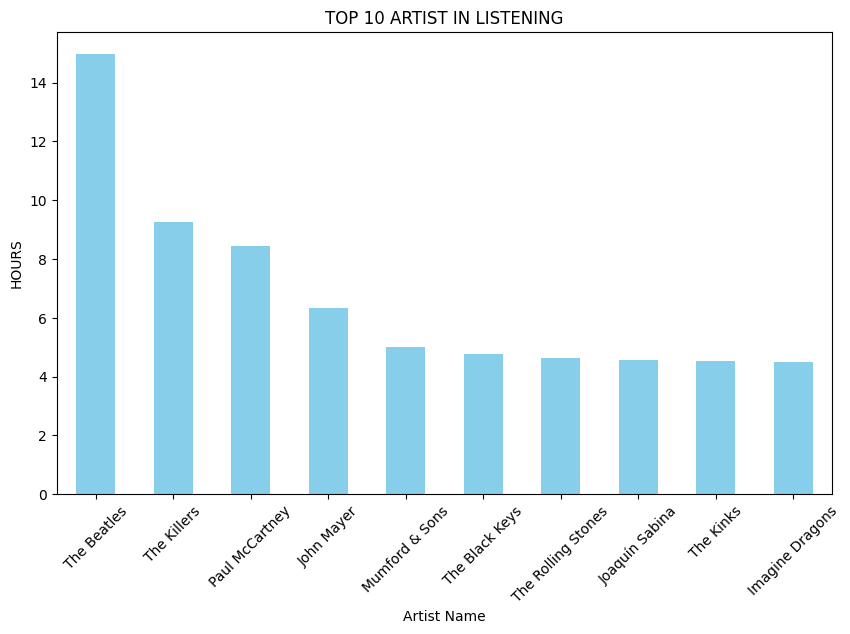

In [24]:
top_artist=df.groupby('artist_name')['ms_played'].sum().sort_values(ascending=False).head(10)
top_artist.plot(kind='bar',figsize=(10,6),color='skyblue')
plt.title('TOP 10 ARTIST IN LISTENING')
plt.xlabel('Artist Name')
plt.ylabel('HOURS')
plt.xticks(rotation=45) #IT ROTATES LABEL OF X-AXIS
plt.show()

**PLATFORM USAGE**

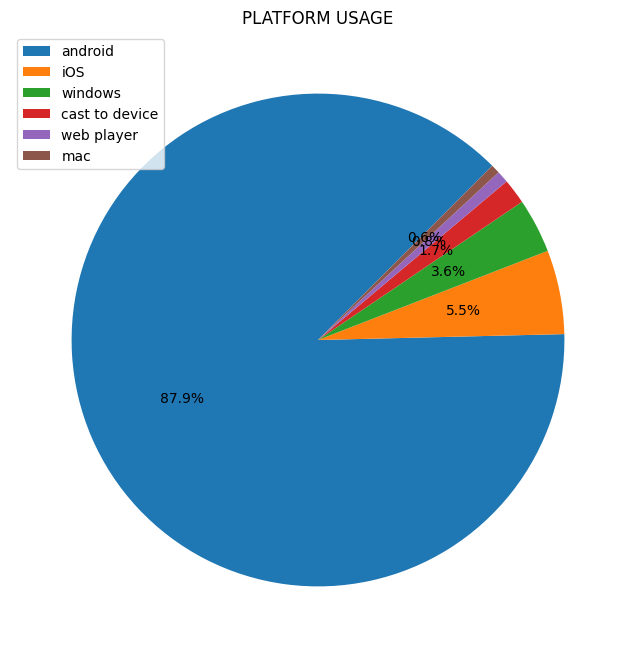

In [25]:
platform_usage=df['platform'].value_counts()
platform_usage.plot(kind='pie',labels=None,autopct='%1.1f%%',figsize=(8,8),startangle=45)
plt.legend(platform_usage.index,loc="best")
plt.title("PLATFORM USAGE")
plt.ylabel('')
plt.show()

**Most Skipped Tracks**

artist_name           track_name                                                                  
JAY-Z                 Ni**as In Paris                                                                 2
The Kinks             Sunny Afternoon                                                                 2
Selena Gomez          Same Old Love                                                                   2
The Script            Superheroes                                                                     2
The Rolling Stones    Can't You Hear Me Knocking - 2009 Mix                                           2
The Temper Trap       Down River                                                                      2
Black Sabbath         War Pigs                                                                        2
Avicii                For A Better Day                                                                2
The Weeknd            The Hills                                      

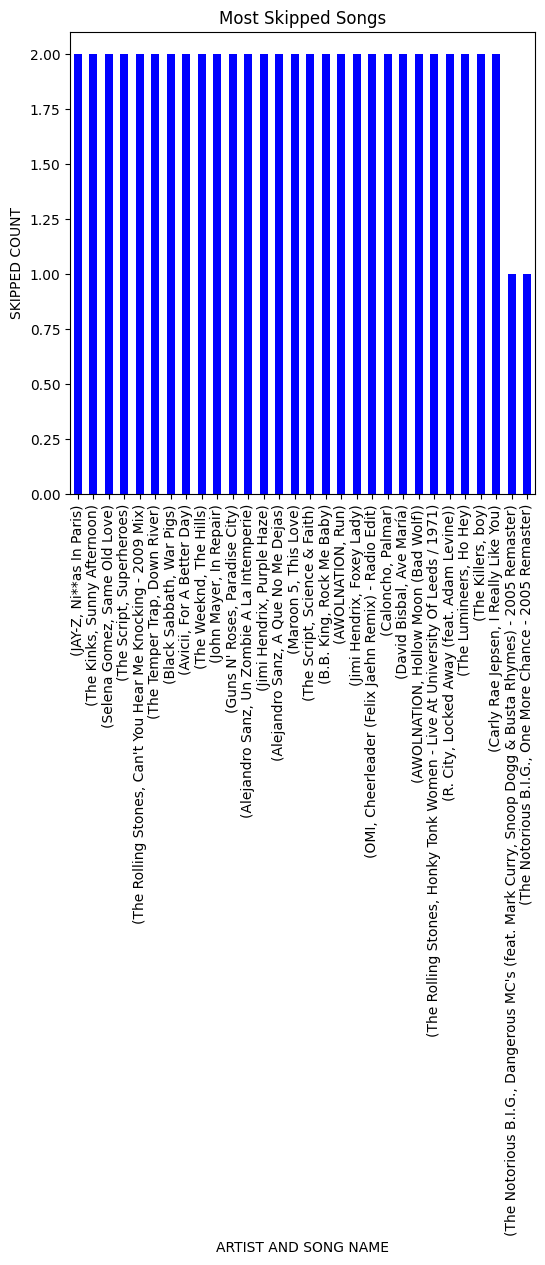

In [26]:
skipped_songs=df.groupby(['artist_name','track_name'])['skipped'].sum().sort_values(ascending=False).head(30)
print(skipped_songs)
skipped_songs.plot(kind='bar',figsize=(6,6),color='blue')
plt.title('Most Skipped Songs')
plt.xlabel('ARTIST AND SONG NAME')
plt.ylabel('SKIPPED COUNT')
plt.show()

ML MODEL:


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Target variable
y = df['skipped']

# Features
categorical_cols = ['platform', 'shuffle', 'reason_start', 'day']
numerical_cols = ['hour', 'ms_played']

X = df[categorical_cols + numerical_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3️⃣ Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numerical_cols)
    ]
)

# 4️⃣ Models to compare
models = {
    "Logistic Regression": LogisticRegression(class_weight='balanced', max_iter=1000),
    "Random Forest": RandomForestClassifier(class_weight='balanced', n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(scale_pos_weight=(len(y_train[y_train==0])/len(y_train[y_train==1])), use_label_encoder=False, eval_metric='logloss')
}

# 5️⃣ Train, evaluate and select best model
best_model = None
best_f1 = 0
for name, clf in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', clf)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))
    
    # Get F1-score for skipped songs (True)
    report = classification_report(y_test, y_pred, output_dict=True)
    f1_skipped = report['True']['f1-score']
    
    if f1_skipped > best_f1:
        best_f1 = f1_skipped
        best_model = name

print(f"Best model for predicting skipped songs: {best_model} with F1-score = {best_f1:.2f}")


--- Logistic Regression ---
              precision    recall  f1-score   support

       False       0.97      0.73      0.83      2984
        True       0.24      0.80      0.37       322

    accuracy                           0.73      3306
   macro avg       0.60      0.76      0.60      3306
weighted avg       0.90      0.73      0.79      3306

--- Random Forest ---
              precision    recall  f1-score   support

       False       0.95      0.98      0.96      2984
        True       0.72      0.56      0.63       322

    accuracy                           0.94      3306
   macro avg       0.84      0.77      0.80      3306
weighted avg       0.93      0.94      0.93      3306

--- XGBoost ---
              precision    recall  f1-score   support

       False       0.97      0.91      0.94      2984
        True       0.47      0.78      0.59       322

    accuracy                           0.89      3306
   macro avg       0.72      0.84      0.76      3306
weighted